In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import seaborn as sns
import math

# Ofertas relampago


## que buscamos:


### * Encontrar insights que nos ayuden a entender que es necesario o que influye en que una oferta sea exitosa.
### * Estas ofertas son buenas para el seller como el buyer, y esto impacta positivamente a MeLi

In [82]:
warnings.filterwarnings('ignore')

In [5]:
data_path='data/ofertas_relampago.csv'
df = pd.read_csv(data_path)

In [ ]:
df.sample(2)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
19756,2021-07-14,2021-07-14 13:00:00+00:00,2021-07-14 19:00:03+00:00,lightning_deal,5,5,NaN,NaN,NaN,none,SPORTS,APP & SPORTS,MLM-LEGGINGS
39033,2021-07-29,2021-07-29 13:00:00+00:00,2021-07-29 19:00:04+00:00,lightning_deal,15,12,15.3,3.0,NaN,free_shipping,PERSONAL CARE,BEAUTY & HEALTH,MLM-MANICURE_AND_PEDICURE_SUPPLIES


In [ ]:
import pandas as pd

def analisis_basico(df):
    """Análisis descriptivo básico del dataset"""    
    
    null_counts = df.isnull().sum()
    null_pct = (null_counts / len(df)) * 100
    type_columns = df.dtypes
    distinct_counts = df.nunique()
    
    min_values = df.describe(include=[float, int]).loc['min']
    max_values = df.describe(include=[float, int]).loc['max']
    mean_values = df.describe(include=[float, int]).loc['mean']
    
    null_df = pd.DataFrame({
        'Nulos': null_counts,
        'Porcentaje': null_pct,
        'Tipo': type_columns,
        'Distintos': distinct_counts
    })
    
    null_df['Min'] = min_values
    null_df['Max'] = max_values
    null_df['Mean'] = mean_values
    print(f"Forma del DataFrame: {df.shape}")
    
    return null_df


In [ ]:
analisis_basico(df).round(2)


Forma del DataFrame: (48746, 13)


,Nulos,Porcentaje,Tipo,Distintos,Min,Max,Mean
OFFER_START_DATE,0,0.00,object,61,NaN,NaN,NaN
OFFER_START_DTTM,0,0.00,object,783,NaN,NaN,NaN
OFFER_FINISH_DTTM,0,0.00,object,7578,NaN,NaN,NaN
OFFER_TYPE,0,0.00,object,1,NaN,NaN,NaN
INVOLVED_STOCK,0,0.00,int64,505,1.00,9000.00,35.01
REMAINING_STOCK_AFTER_END,0,0.00,int64,801,-192.00,8635.00,30.57
SOLD_AMOUNT,24167,49.58,float64,7603,0.28,4836.57,51.21
SOLD_QUANTITY,24167,49.58,float64,373,1.00,1646.00,10.85
ORIGIN,37430,76.79,object,1,NaN,NaN,NaN
SHIPPING_PAYMENT_TYPE,0,0.00,object,2,NaN,NaN,NaN


In [ ]:
#dejemos las fechas en su formato original
df['OFFER_START_DATE'] = pd.to_datetime(df['OFFER_START_DATE'])
df['OFFER_START_DTTM'] = pd.to_datetime(df['OFFER_START_DTTM'])
df['OFFER_FINISH_DTTM'] = pd.to_datetime(df['OFFER_FINISH_DTTM'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   OFFER_START_DATE           48746 non-null  datetime64[ns]     
 1   OFFER_START_DTTM           48746 non-null  datetime64[ns, UTC]
 2   OFFER_FINISH_DTTM          48746 non-null  datetime64[ns, UTC]
 3   OFFER_TYPE                 48746 non-null  object             
 4   INVOLVED_STOCK             48746 non-null  int64              
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64              
 6   SOLD_AMOUNT                24579 non-null  float64            
 7   SOLD_QUANTITY              24579 non-null  float64            
 8   ORIGIN                     11316 non-null  object             
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object             
 10  DOM_DOMAIN_AGG1            48746 non-null  object             
 11  VE

### Analisis sobre variables cualitativas

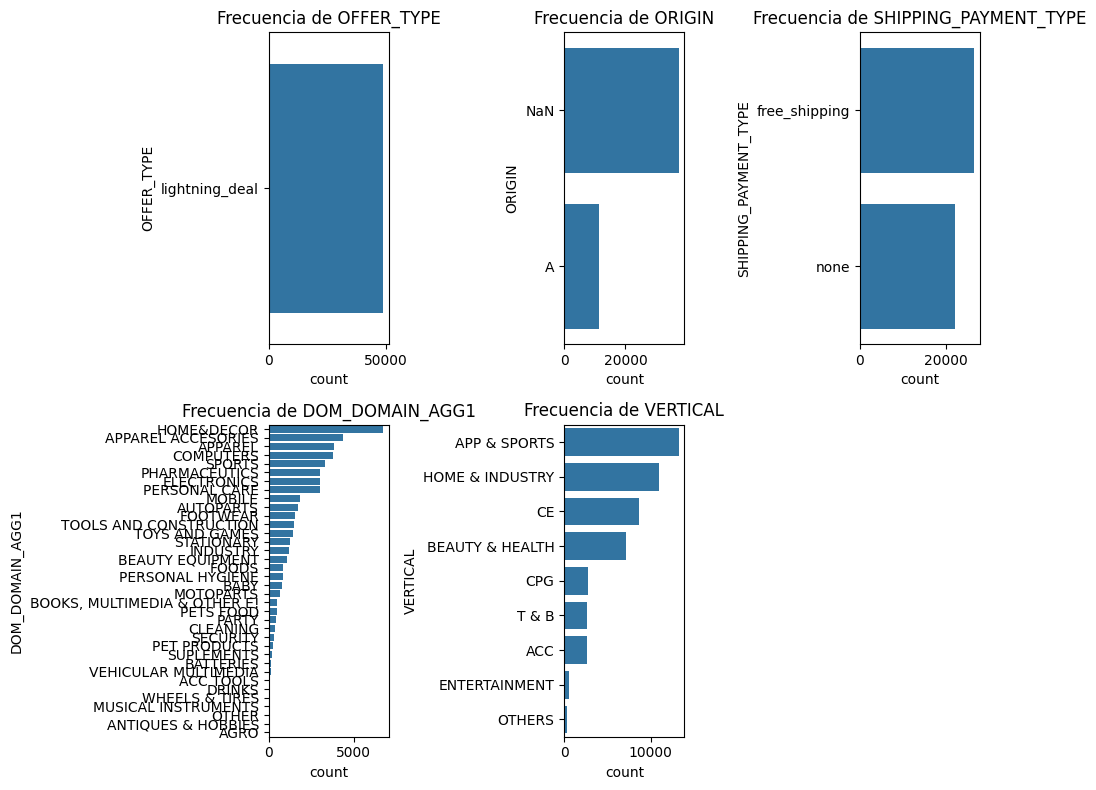

In [ ]:

object_cols = [c for c in df.columns if c != 'DOMAIN_ID' and df[c].dtype == 'object']

n_cols = 3
n_graphs = len(object_cols)
n_rows = math.ceil(n_graphs / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 8))
axes = np.atleast_1d(axes).ravel()

for idx, c in enumerate(object_cols):
    ax = axes[idx]
    order = df[c].fillna('NaN').value_counts().index
    sns.countplot(y=c, data=df.fillna('NaN'), order=order, ax=ax)
    ax.set_title(f'Frecuencia de {c}')

for j in range(n_graphs, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
#entender por que vertical agrupa los domain
tmp=pd.DataFrame(df[['VERTICAL','DOM_DOMAIN_AGG1']].fillna('NA')).pivot_table(
    index='DOM_DOMAIN_AGG1',
    #columns='VERTICAL',
    aggfunc='nunique'
)
pd.DataFrame(df[['VERTICAL','ORIGIN']].fillna('NA').value_counts()).reset_index().sort_values(by='VERTICAL',ascending=False)

,VERTICAL,ORIGIN,count
11,T & B,A,1114
10,T & B,NA,1510
17,OTHERS,A,75
15,OTHERS,NA,204
1,HOME & INDUSTRY,NA,8575
4,HOME & INDUSTRY,A,2436
16,ENTERTAINMENT,A,117
13,ENTERTAINMENT,NA,408
12,CPG,A,934
9,CPG,NA,1780


In [ ]:
compara = df.fillna(0).groupby('ORIGIN').agg({
    'SOLD_QUANTITY': [ 'sum'],
    'INVOLVED_STOCK': ['sum'],
    'SOLD_AMOUNT': ['mean']
}).round(2)
compara['RATIO'] = compara['SOLD_QUANTITY']['sum'] / compara['INVOLVED_STOCK']['sum']
compara

,SOLD_QUANTITY,INVOLVED_STOCK,SOLD_AMOUNT,RATIO
,sum,sum,mean,
ORIGIN,,,,
0,78738.0,366878,11.23,0.214616
A,187970.0,1339598,74.10,0.140318


In [86]:

compara = df.fillna(0).groupby('SHIPPING_PAYMENT_TYPE').agg({
    'SOLD_QUANTITY': [ 'sum'],
    'INVOLVED_STOCK': ['sum'],
    'SOLD_AMOUNT': ['mean']
}).round(2)
compara['RATIO'] = compara['SOLD_QUANTITY']['sum'] / compara['INVOLVED_STOCK']['sum']
compara

,SOLD_QUANTITY,INVOLVED_STOCK,SOLD_AMOUNT,RATIO
,sum,sum,mean,
SHIPPING_PAYMENT_TYPE,,,,
free_shipping,64347.0,592537,28.08,0.108596
none,202361.0,1113939,23.10,0.181663


In [27]:
# Primeras conclusiones: 
# * Descartamos las columnas que no aportan información relevante para el analisis. como es OFFER_TYPE 
# * ORIGEN tiene gran cantidad de valores nulos, pero un analisis mas profundo nos muestra que tiene costos mayores por lo que si tiene una tendencia.  
# * SHIPPING_PAYMENT_TYPE tiene solo dos valores, pero es claro su interprestación y debe ser tratado como 0 los none. 
# * VERTICAL agrupa los domain en categorias o segmentos, por lo que para reducir la cantidad de variables, es necesario agrupar los domain por vertical.   

### Analisis sobre la serie

In [59]:
df['HORA']=df['OFFER_START_DTTM'].dt.hour
df['DIA']=df['OFFER_START_DTTM'].dt.dayofweek

In [60]:
def func_ratio(df,title,campo):
    g = (df.groupby(campo, as_index=False)
        .agg(INVOLVED_STOCK=('INVOLVED_STOCK','sum'),
                SOLD_QUANTITY=('SOLD_QUANTITY','sum')))


    g['RATIO'] = g['SOLD_QUANTITY'] / g['INVOLVED_STOCK'].replace(0, np.nan)

    fig, ax1 = plt.subplots(figsize=(5, 2))

    sns.lineplot(data=g, x=campo, y='INVOLVED_STOCK', ax=ax1, label='Stock')
    sns.lineplot(data=g, x=campo, y='SOLD_QUANTITY', ax=ax1, label='Vendidas')
    plt.title(title)
    ax1.set_ylabel('Unidades')
    ax1.set_xlabel('Fecha')

    ax2 = ax1.twinx()
    sns.lineplot(data=g, x=campo, y='RATIO', ax=ax2, label='Ratio', linestyle='--')
    ax2.set_ylabel('Ratio ventas/stock')



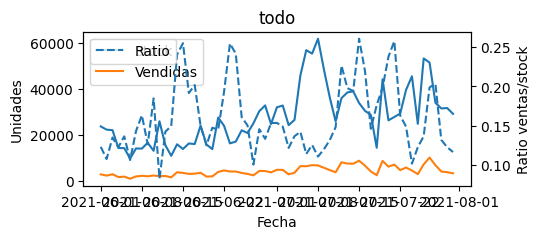

In [62]:
func_ratio(df.fillna(0),"todo","OFFER_START_DATE")

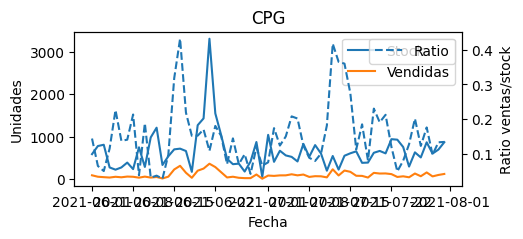

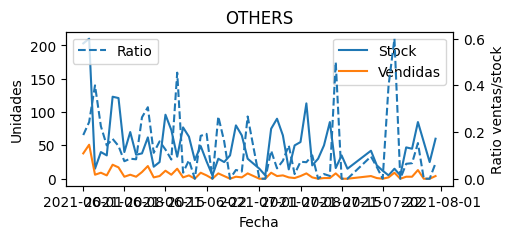

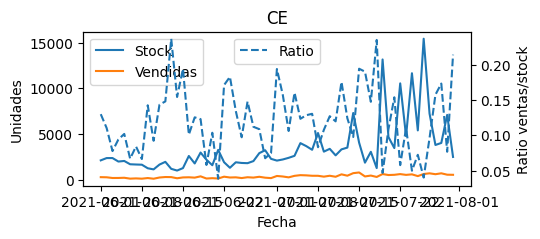

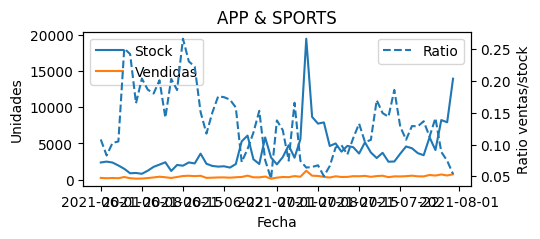

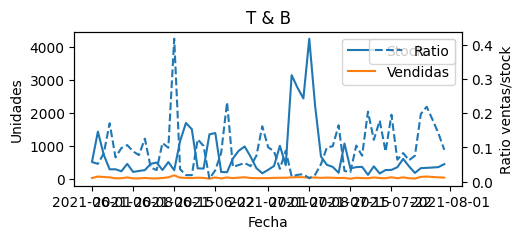

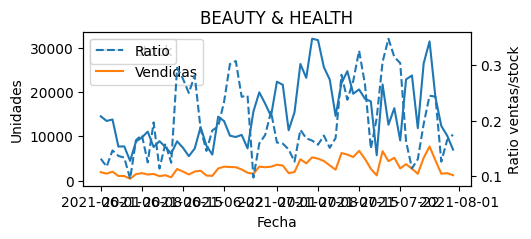

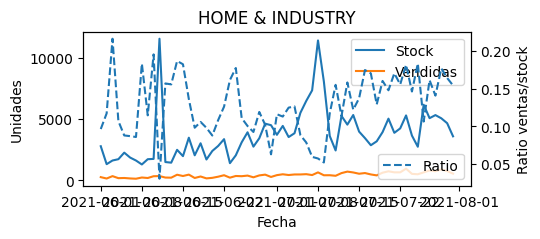

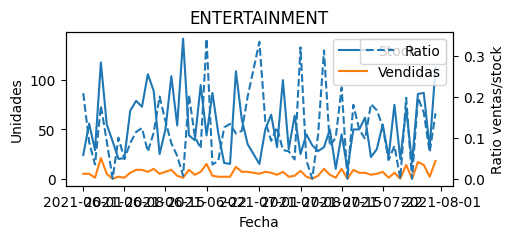

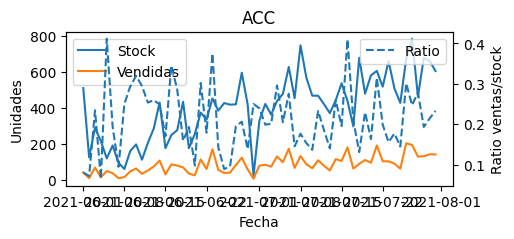

In [58]:
for i in df.fillna(0).VERTICAL.unique():
    df_tmp=df[df.VERTICAL == i]
    func_ratio(df_tmp,i)

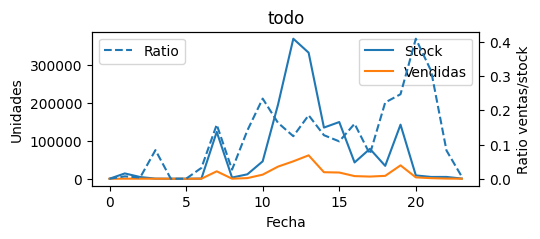

In [63]:
func_ratio(df.fillna(0),"todo","HORA")

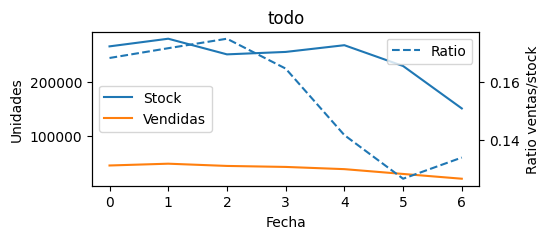

In [64]:
func_ratio(df.fillna(0),"todo","DIA")

In [65]:
# Primeras conclusiones: 
# * se tiene un buen historial de ventas un mes 
# * en algunos fechas unas verticales son mejores que otras, ranqueando ACC  y BEAUTY & HEALTH	
# * las horas de 10 o 20 son las mejores para las ventas
# * los dias de mejor conversión son los inicios de semana

### Analisis sobre las variables cuantitativas

In [77]:
pivot = df.fillna(0).pivot_table(
    index='VERTICAL',
    values=['SOLD_QUANTITY','INVOLVED_STOCK','SOLD_AMOUNT'],
    aggfunc='sum'
)
pivot['RATIO'] = pivot['SOLD_QUANTITY'] / pivot['INVOLVED_STOCK']
pivot['PRECIO_MEDIO'] = pivot['SOLD_AMOUNT'] / pivot['SOLD_QUANTITY']
pivot.sort_values(by='RATIO',ascending=False)

,INVOLVED_STOCK,SOLD_AMOUNT,SOLD_QUANTITY,RATIO,PRECIO_MEDIO
VERTICAL,,,,,
ACC,24611,26819.98,5156.0,0.209500,5.201703
BEAUTY & HEALTH,910449,547427.27,178141.0,0.195663,3.073000
CPG,39959,16787.68,5696.0,0.142546,2.947275
OTHERS,2900,1929.24,357.0,0.123103,5.404034
HOME & INDUSTRY,230207,155518.68,27161.0,0.117985,5.725808
ENTERTAINMENT,3167,1988.57,357.0,0.112725,5.570224
APP & SPORTS,239958,131101.36,25658.0,0.106927,5.109571
CE,211417,362787.94,21833.0,0.103270,16.616495
T & B,43808,14302.78,2349.0,0.053620,6.088880


In [78]:
pivot.sort_values(by='SOLD_AMOUNT',ascending=False)

,INVOLVED_STOCK,SOLD_AMOUNT,SOLD_QUANTITY,RATIO,PRECIO_MEDIO
VERTICAL,,,,,
BEAUTY & HEALTH,910449,547427.27,178141.0,0.195663,3.073000
CE,211417,362787.94,21833.0,0.103270,16.616495
HOME & INDUSTRY,230207,155518.68,27161.0,0.117985,5.725808
APP & SPORTS,239958,131101.36,25658.0,0.106927,5.109571
ACC,24611,26819.98,5156.0,0.209500,5.201703
CPG,39959,16787.68,5696.0,0.142546,2.947275
T & B,43808,14302.78,2349.0,0.053620,6.088880
ENTERTAINMENT,3167,1988.57,357.0,0.112725,5.570224
OTHERS,2900,1929.24,357.0,0.123103,5.404034


In [70]:
pivot = df.fillna(0).pivot_table(
    index='DOMAIN_ID',
    values=['SOLD_QUANTITY','INVOLVED_STOCK','SOLD_AMOUNT'],
    aggfunc='sum'
)
pivot['RATIO'] = pivot['SOLD_QUANTITY'] / pivot['INVOLVED_STOCK']
pivot.sort_values(by='RATIO',ascending=False).head(10)

,INVOLVED_STOCK,SOLD_AMOUNT,SOLD_QUANTITY,RATIO
DOMAIN_ID,,,,
MLM-NASAL_CPAP_MASKS,5,17.48,15.0,3.0
MLM-CAMERA_STRAPS,5,16.54,8.0,1.6
MLM-KITCHEN_PAPER_TOWELS,25,9.25,35.0,1.4
MLM-TEA_INFUSERS,5,10.88,7.0,1.4
MLM-LAUNDRY_WASH_BALLS,5,20.87,7.0,1.4
MLM-KITCHEN_POTHOLDERS_AND_OVEN_MITTS,5,8.05,7.0,1.4
MLM-ESOTERIC_PENDULUMS,5,12.04,6.0,1.2
MLM-LAUNDRY_BAR_SOAPS,110,32.05,121.0,1.1
MLM-COMBS,5,10.80,5.0,1.0


<Axes: >

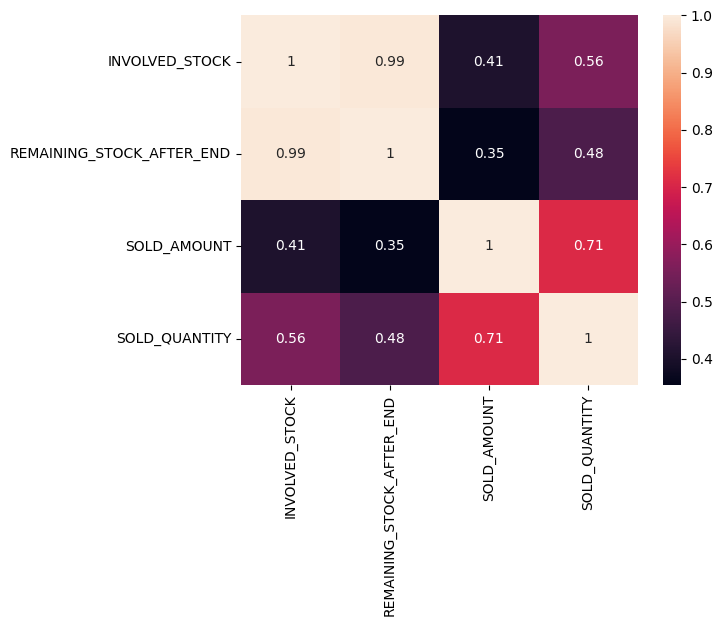

In [76]:
tmp=df.select_dtypes(exclude=['object']).drop(columns=['OFFER_START_DATE','OFFER_START_DTTM','OFFER_FINISH_DTTM','HORA','DIA']).corr()
sns.heatmap(tmp,annot=True)

In [ ]:
# INSIGHTS CLAVE
# ACC es eficiente pero genera poco dinero
# 21% de conversión (mejor ratio)
# Solo $27K en revenue total
# Por qué: Productos baratos, poco stock
# CE (Electronics) es lo contrario
# 10% de conversión (peor ratio)
# $363K en revenue (segundo mejor)
# Por qué: Productos caros, mucho stock
# BEAUTY & HEALTH es el balance perfecto
# 20% de conversión (excelente)
# $547K en revenue (el mejor)
# Por qué: Productos con buen precio + alta demanda

# Priorizar vendedores Premium (A) - Factor #1 de éxito (5x impacto)
# Exigir stock mínimo >50 unidades - Stock grande = señal de compromiso
# Enfocar en:
# Tecnología (celulares, TVs, tablets)
# Belleza & Salud
# Horarios: 5 PM y 10 PM
# Lunes-Miércoles